Load necessary modules

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Generate artificial training data

In [2]:
N = 2000

np.random.seed(4)
X1 = np.random.multivariate_normal([6,-6],[[1.2,0],[0,1.2]],N)
X1 = np.concatenate((X1,1.0*np.ones((N,1))),axis=1)
X2 = np.random.multivariate_normal([0,0],[[1.2,0],[0,1.2]],N)
X2 = np.concatenate((X2,2.0*np.ones((N,1))),axis=1)
X3 = np.random.multivariate_normal([-6,6],[[1.2,0],[0,1.2]],N)
X3 = np.concatenate((X3,3.0*np.ones((N,1))),axis=1)

X = np.concatenate((X1,X2,X3));

Build and train classifier via linear regression by indicator matrix 

In [3]:
lb = LabelBinarizer()
lb.fit([1,2,3])
Y = lb.transform(X[:,2])

lr = LinearRegression()
lr.fit(X[:,[0,1]],Y)

LinearRegression()

Plot classifier based on linear regression on indicator matrix

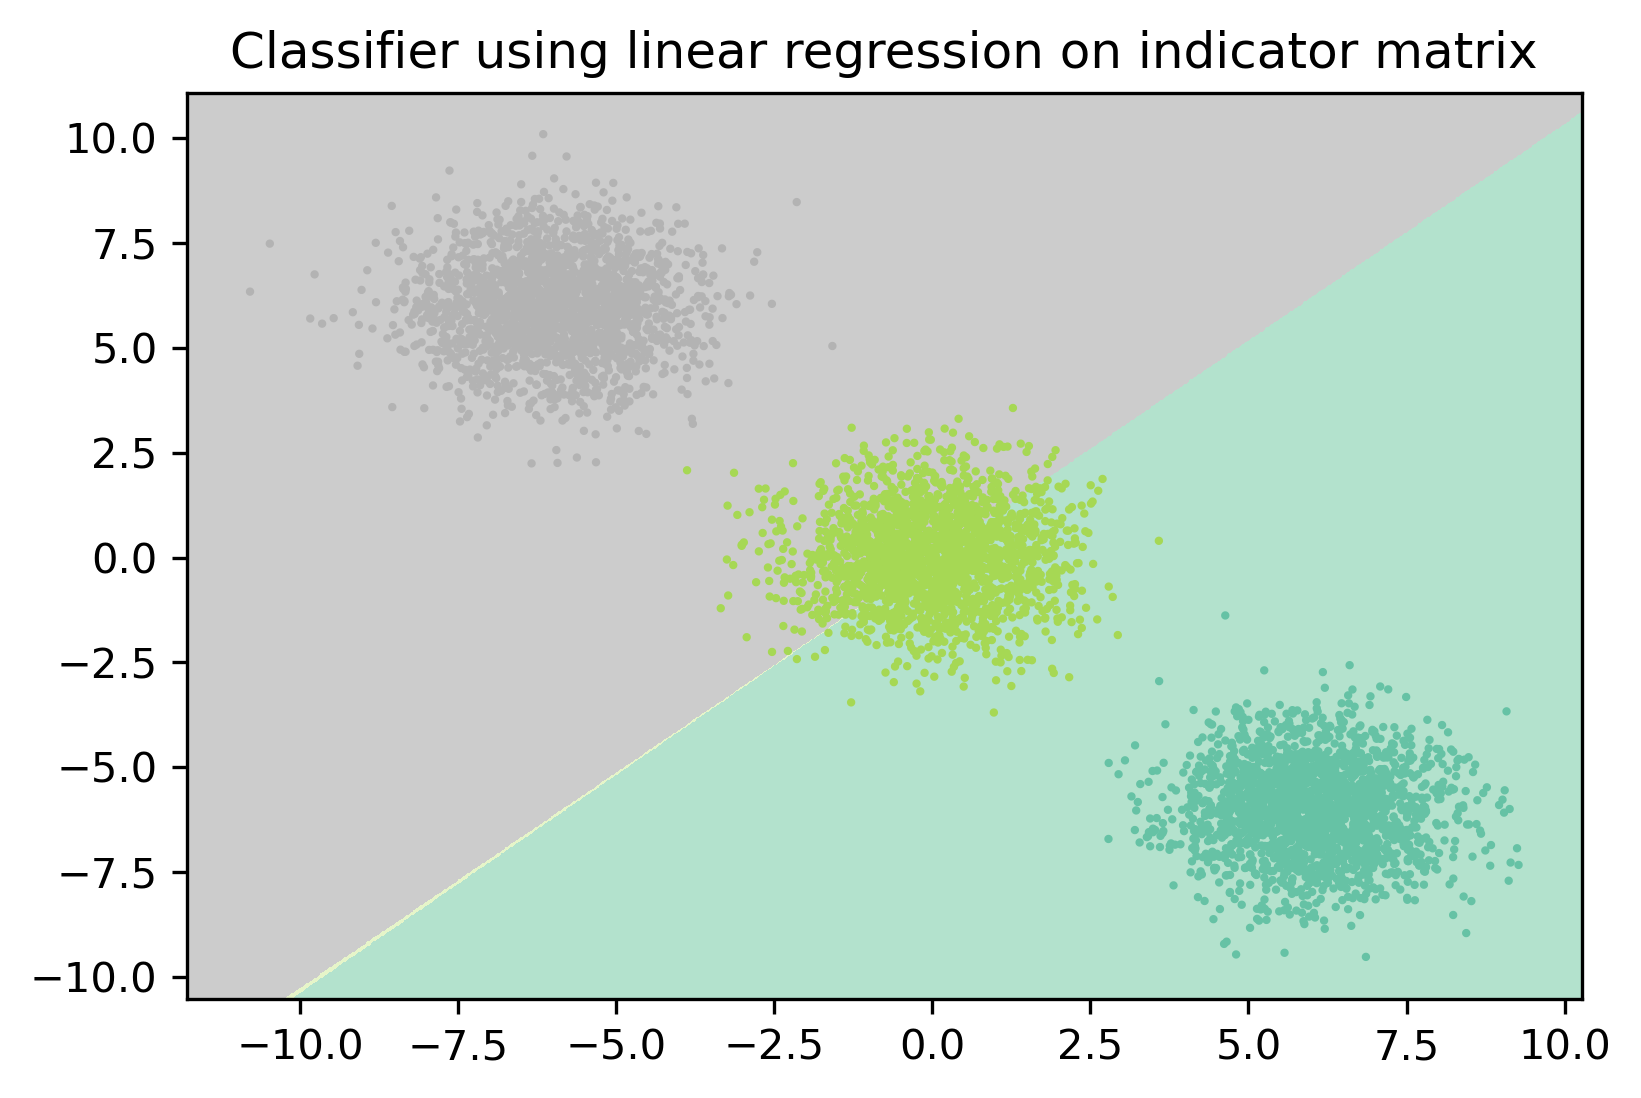

In [4]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = lb.inverse_transform(lr.predict(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.figure(dpi=300)
plt.pcolormesh(xx, yy, Z, cmap='Pastel2', shading='auto')

plt.scatter(X[:,0],X[:,1],s=1,c=X[:,2],cmap='Set2');
plt.title("Classifier using linear regression on indicator matrix")
plt.show()

Build and train classifier via linear discriminant analysis

In [5]:
lda = LinearDiscriminantAnalysis()
lda.fit(X[:,[0,1]], X[:,2])

LinearDiscriminantAnalysis()

Plot classifier based on linear discriminant analysis

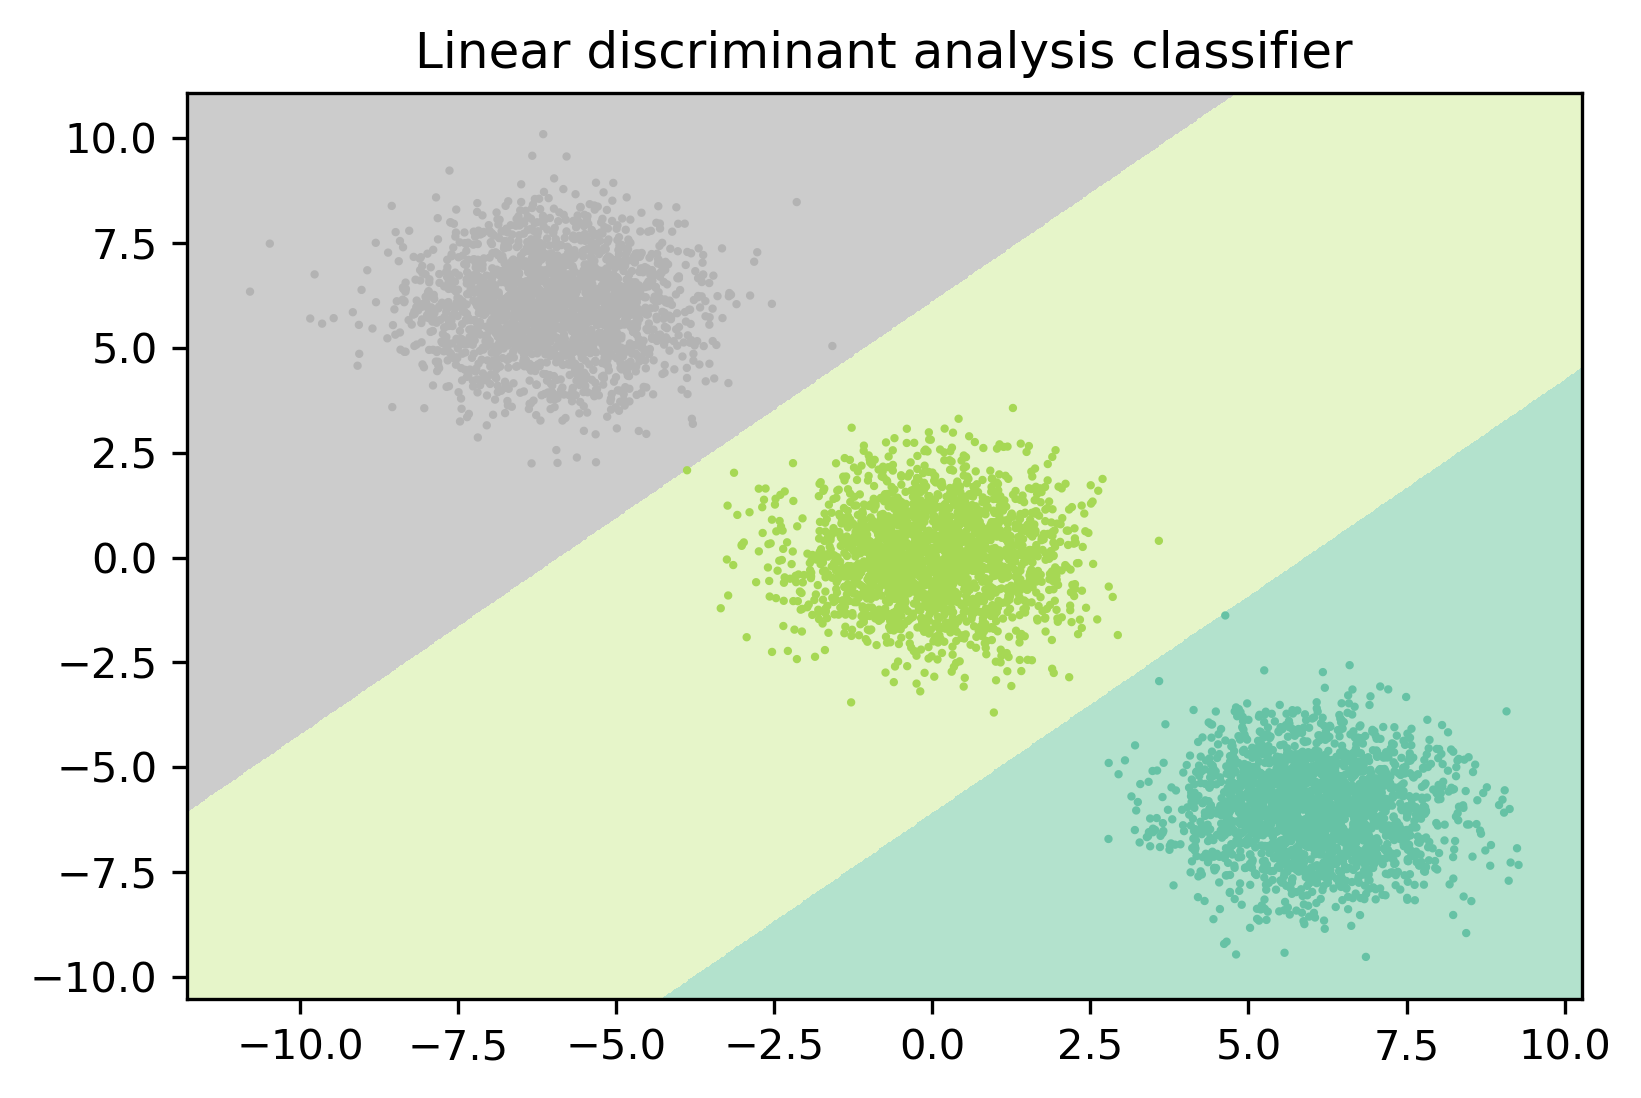

In [6]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(dpi=300)
plt.pcolormesh(xx, yy, Z, cmap='Pastel2', shading='auto')

plt.scatter(X[:,0],X[:,1],s=1,c=X[:,2],cmap='Set2');
plt.title("Linear discriminant analysis classifier")
plt.show()

Build and train classifier via kNN classification

In [7]:
k = 3
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X[:,[0,1]], X[:,2])

KNeighborsClassifier(n_neighbors=3)

Plot classifier based on kNN classification

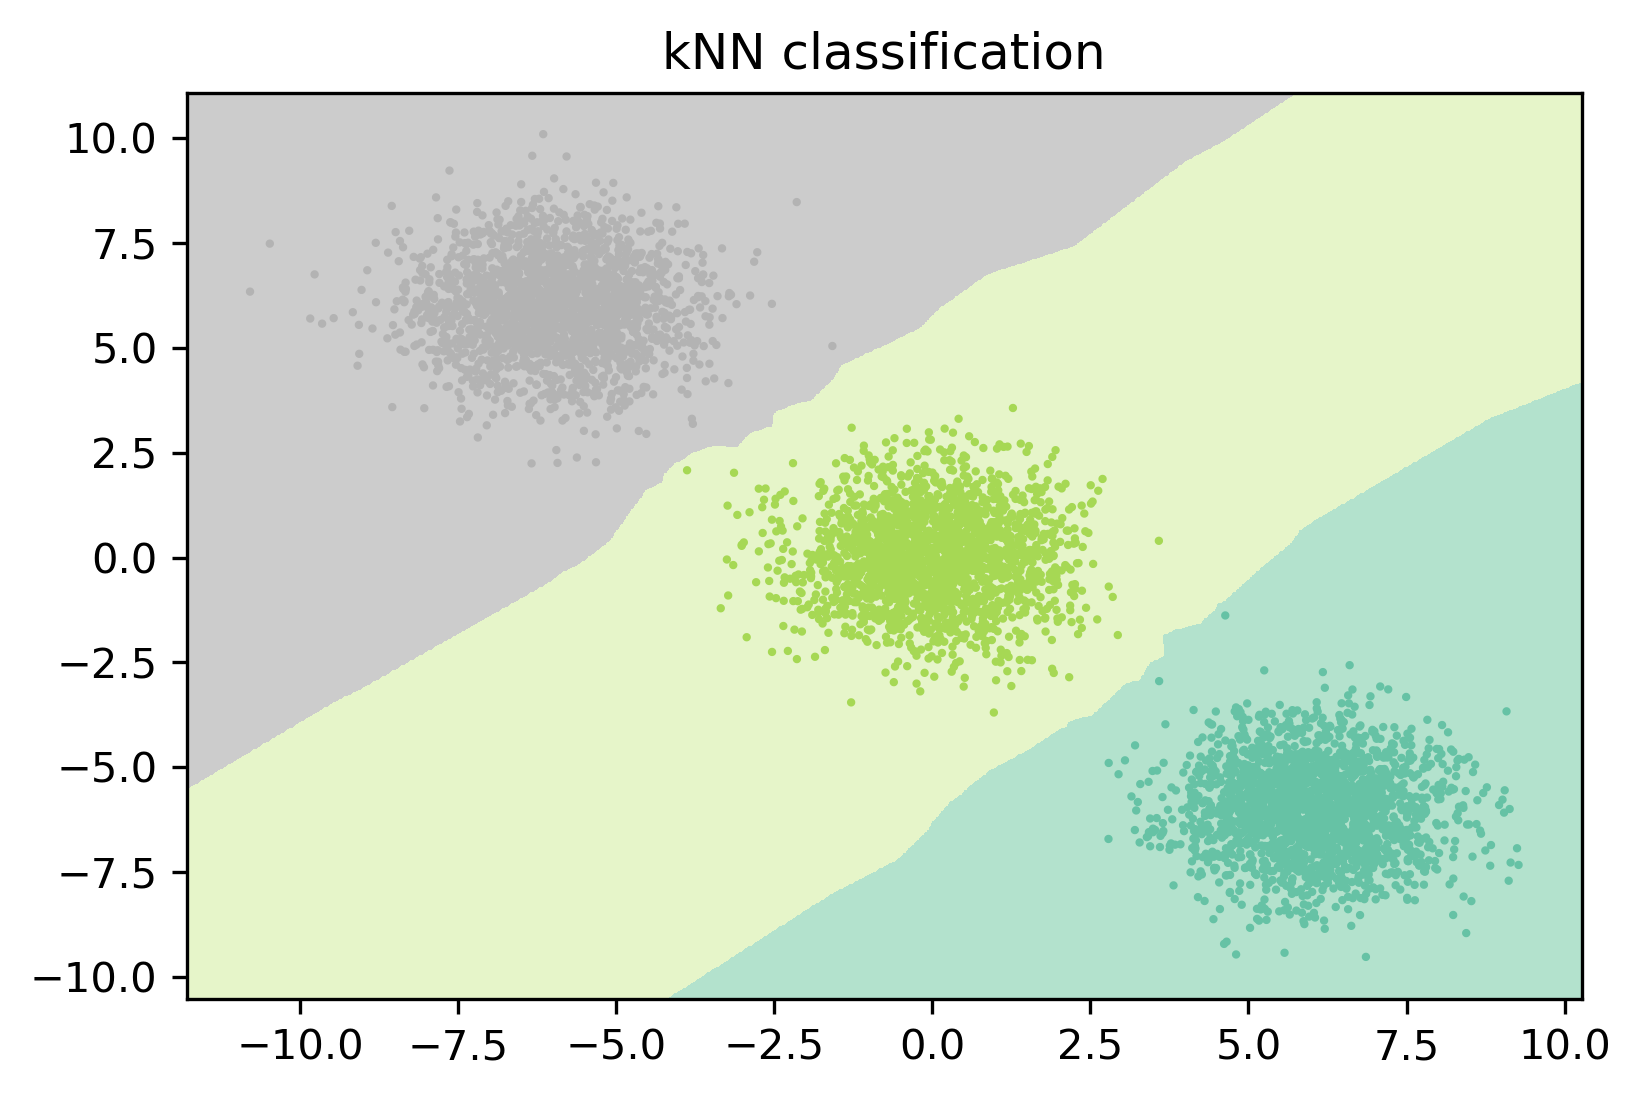

In [8]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(dpi=300)
plt.pcolormesh(xx, yy, Z, cmap="Pastel2", shading='auto')

plt.scatter(X[:,0],X[:,1],s=1,c=X[:,2],cmap="Set2");
plt.title("kNN classification")
plt.show()